In [44]:

import sys
sys.path.append('../scripts')  # Appending the path to access the scripts folder
from EDA_functions import * 

In [45]:
# Step 1: Convert .txt file to .csv
# Load the .txt file (pipe-delimited)
txt_file_path = 'C:\\Users\\Toshiba\\Documents\\Kifiya\\week 3\\Data\\MachineLearningRating_v3.txt'
df = pd.read_csv(txt_file_path, delimiter='|')

# Save the DataFrame to a CSV file
csv_file_path = 'C:\\Users\\Toshiba\\Documents\\Kifiya\\week 3\\Data\\converted_data.csv'
df.to_csv(csv_file_path, index=False)
print(f"Data successfully converted from .txt to {csv_file_path}")

# Load the newly created CSV file for further analysis
df = pd.read_csv(csv_file_path)


In [41]:
display(df.head())

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [42]:
display(df.columns)

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

In [43]:
# Function to handle missing values
def handle_missing_values(df):
    # Filling missing values for numerical columns with their mean
    df = df.fillna(df.mean(numeric_only=True))
    
    # Filling missing categorical values with mode
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        df[column].fillna(df[column].mode()[0], inplace=True)
    
    return df

# Function to convert data types
def convert_data_types(df):
    # Convert TransactionMonth to datetime format
    df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')
    return df

# Function to remove duplicates
def remove_duplicates(df):
    df = df.drop_duplicates()
    return df

# Function to handle outliers using IQR
def remove_outliers(df):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # Calculate IQR for numerical columns
    Q1 = df[numerical_columns].quantile(0.25)
    Q3 = df[numerical_columns].quantile(0.75)
    IQR = Q3 - Q1
    
    # Filter out outliers
    df = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    
    return df

def clean_data(df):
    df = handle_missing_values(df)
    df = convert_data_types(df)
    df = remove_duplicates(df)
    df = remove_outliers(df)
    
    return df
df= clean_data(df)

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_9240\884766659.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


KeyboardInterrupt: 

In [32]:
# 1. Descriptive Statistics
display_descriptive_statistics(df)


Descriptive Statistics:



,TotalPremium,TotalClaims,CalculatedPremiumPerTerm,SumInsured
count,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,6.190550e+01,6.486119e+01,1.178757e+02,6.041727e+05
std,2.302845e+02,2.384075e+03,3.997017e+02,1.508332e+06
min,-7.825768e+02,-1.200241e+04,0.000000e+00,1.000000e-02
25%,0.000000e+00,0.000000e+00,3.224800e+00,5.000000e+03
50%,2.178333e+00,0.000000e+00,8.436900e+00,7.500000e+03
75%,2.192982e+01,0.000000e+00,9.000000e+01,2.500000e+05
max,6.528260e+04,3.930921e+05,7.442217e+04,1.263620e+07


In [33]:
    # 2. Data Structure
display_data_structure(df)



Data Structure:



UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

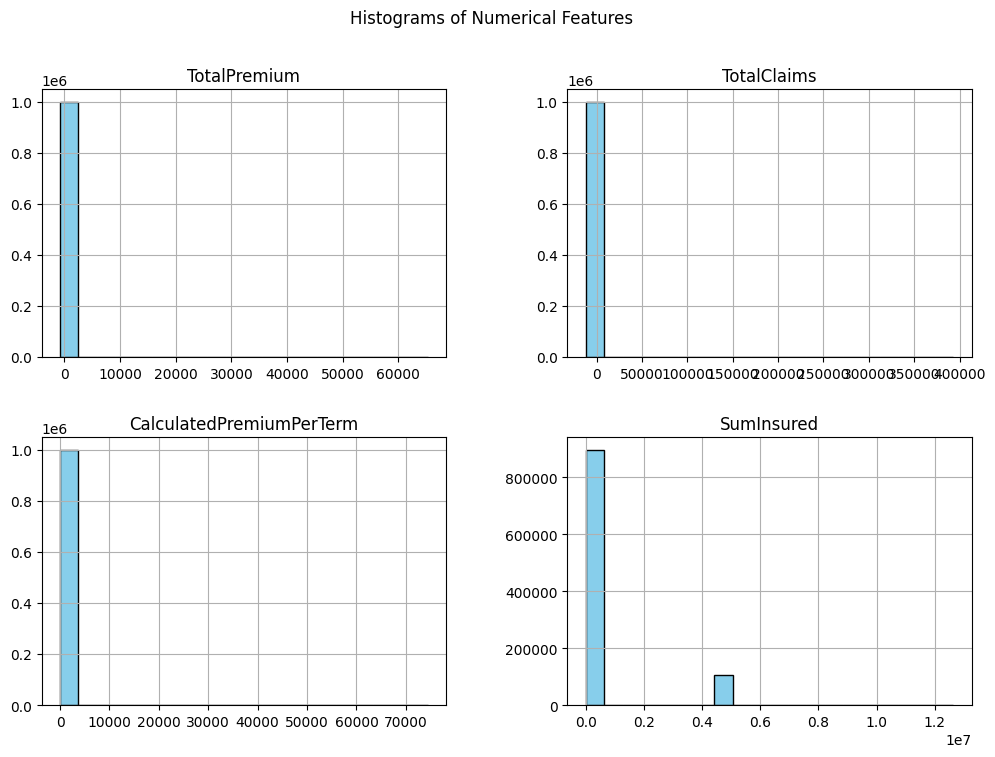

c:\Users\Toshiba\Documents\Kifiya\week 3\notebooks\../scripts\EDA_functions.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', ax=axes[i])
c:\Users\Toshiba\Documents\Kifiya\week 3\notebooks\../scripts\EDA_functions.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', ax=axes[i])
c:\Users\Toshiba\Documents\Kifiya\week 3\notebooks\../scripts\EDA_functions.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', ax=axes[i])
c:\Users\Toshiba\Docum

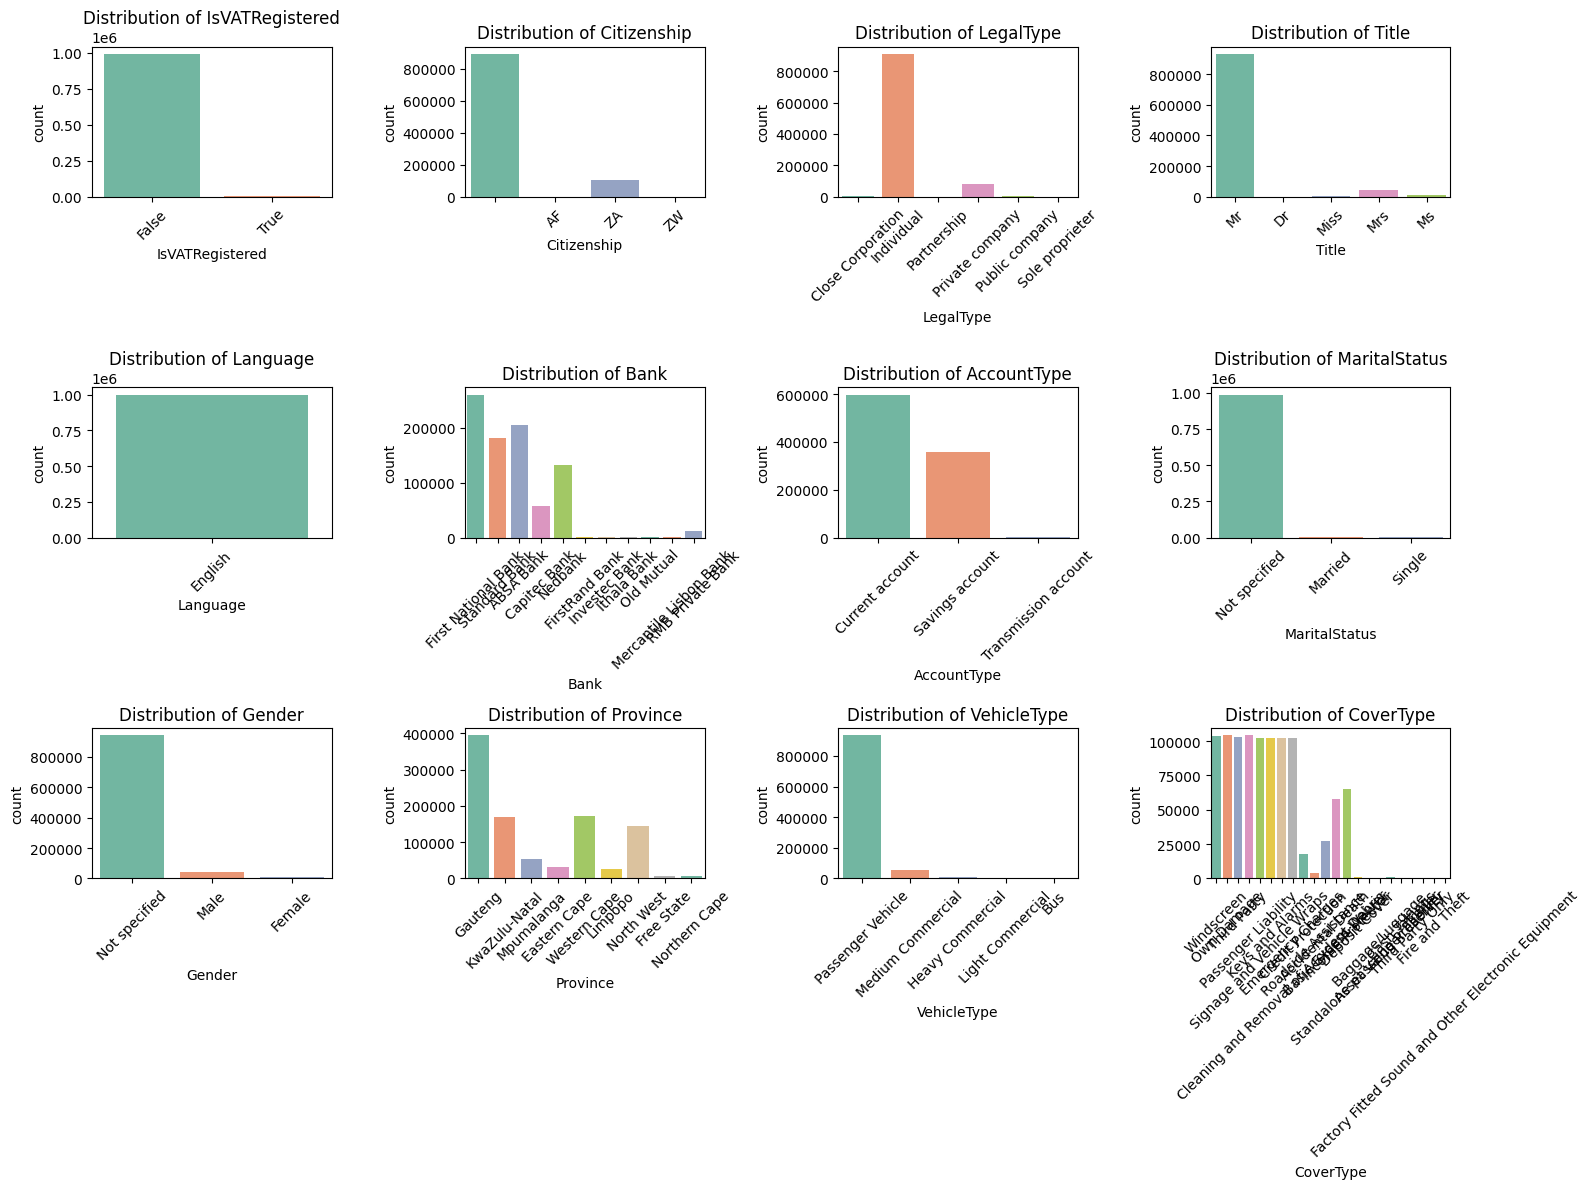

In [34]:
    # 3. Univariate Analysis (Numerical and Categorical)
plot_numerical_distribution(df)
plot_categorical_distribution(df)

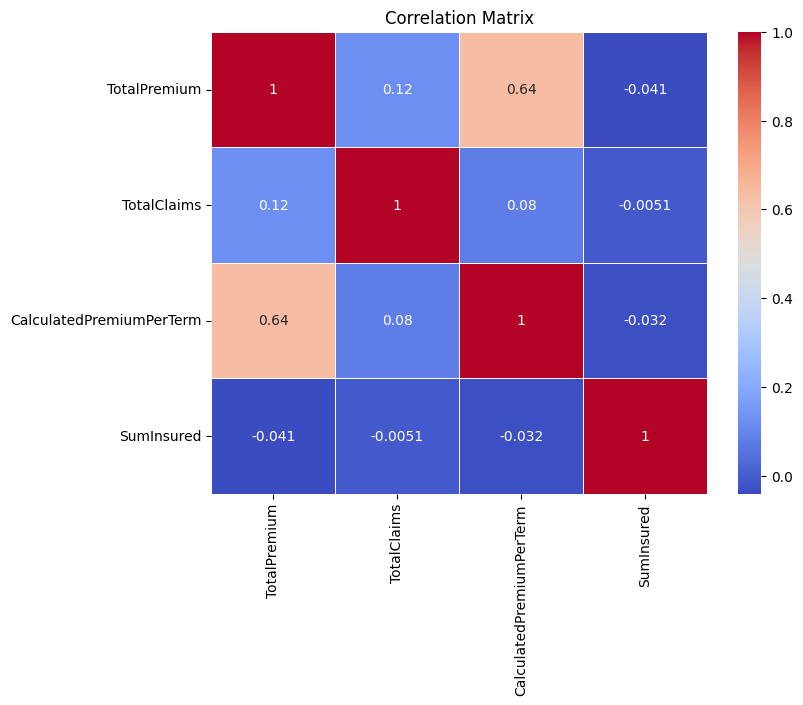

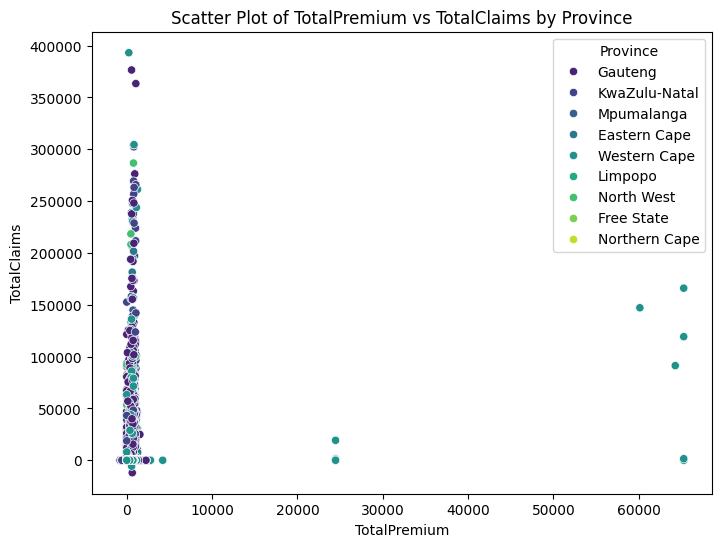

In [35]:
    # 4. Bivariate and Multivariate Analysis
plot_correlation_and_scatter(df)

In [36]:
   # 5. Trends over Geography
analyze_trends_by_province(df)


Trends Over Geography (Province):



,CoverType,CalculatedPremiumPerTerm
Province,,
Eastern Cape,Signage and Vehicle Wraps,25.0
Free State,Windscreen,85.0
Gauteng,Own Damage,25.0
KwaZulu-Natal,Third Party,25.0
Limpopo,Cleaning and Removal of Accident Debris,25.0
Mpumalanga,Windscreen,85.0
North West,Third Party,85.0
Northern Cape,Windscreen,25.0
Western Cape,Third Party,25.0


c:\Users\Toshiba\Documents\Kifiya\week 3\notebooks\../scripts\EDA_functions.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set3')
c:\Users\Toshiba\Documents\Kifiya\week 3\notebooks\../scripts\EDA_functions.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set3')
c:\Users\Toshiba\Documents\Kifiya\week 3\notebooks\../scripts\EDA_functions.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set3')
c:\Users\Toshiba\Documents\Kifiya\week 3\notebooks\../scripts\EDA_functions.py:

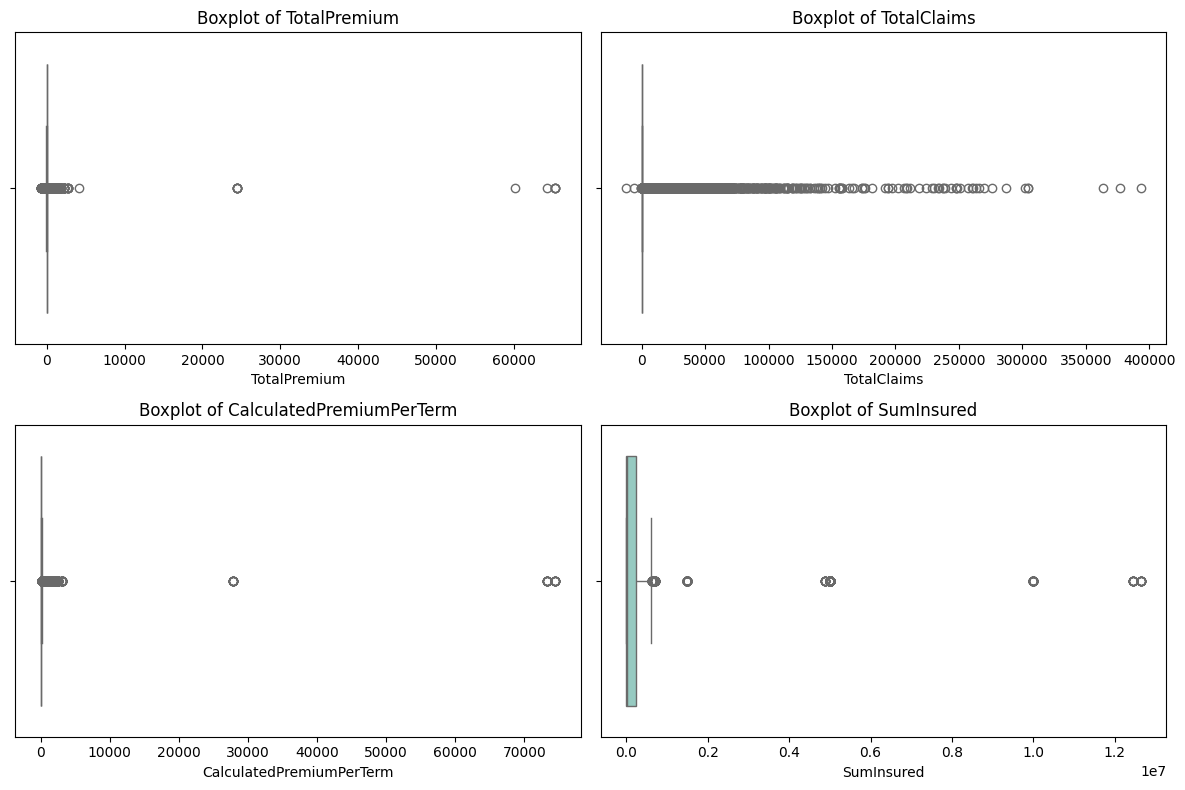

In [38]:

    # 6. Outlier Detection
plot_outliers(df)

c:\Users\Toshiba\Documents\Kifiya\week 3\notebooks\../scripts\EDA_functions.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='VehicleType', y='TotalPremium', data=df, palette='husl')


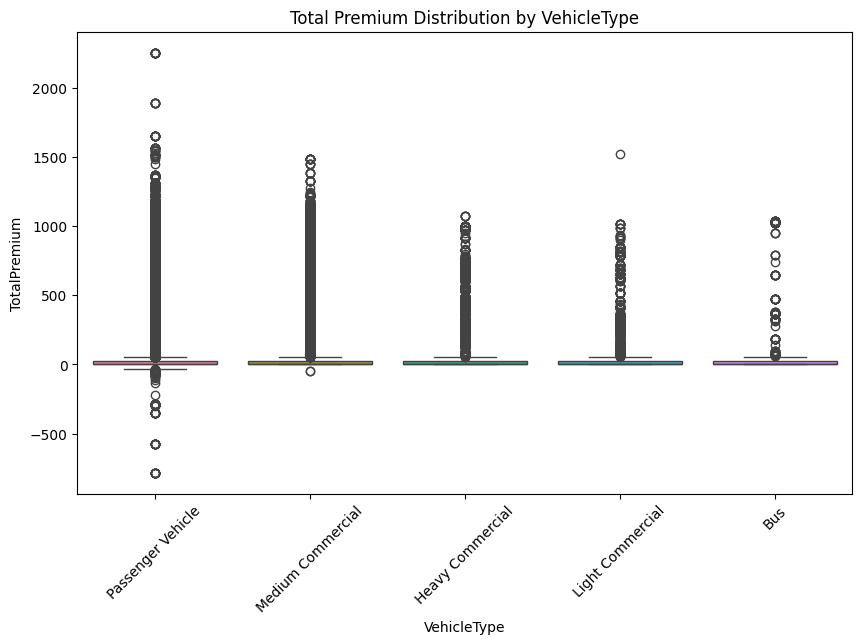

c:\Users\Toshiba\Documents\Kifiya\week 3\notebooks\../scripts\EDA_functions.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CoverType', y='TotalClaims', data=df, palette='muted')


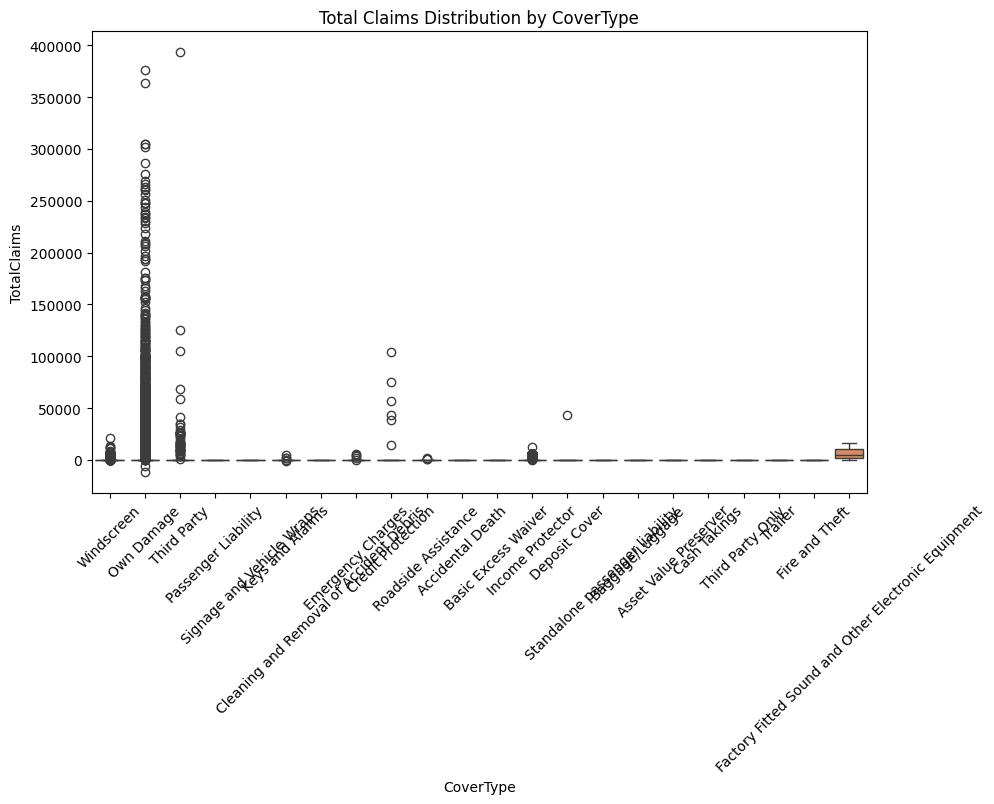

c:\Users\Toshiba\Documents\Kifiya\week 3\notebooks\../scripts\EDA_functions.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VehicleType', y='CalculatedPremiumPerTerm', data=df, palette='coolwarm')


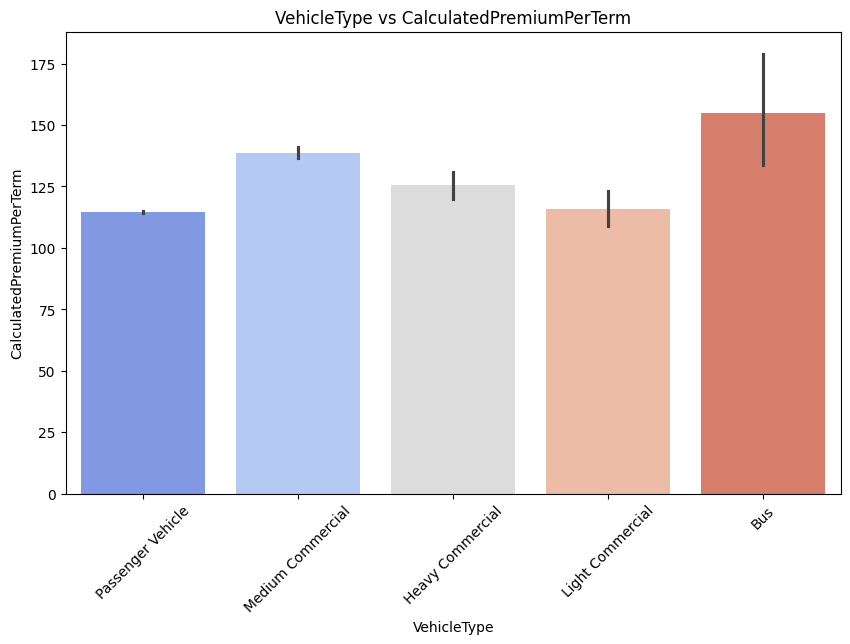

In [37]:
    # 7. Creative Visualizations
creative_visualizations(df)